In [23]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [24]:
co2 = pd.read_csv(r"../data/CO2.csv")
co2["CO2 cum"] = co2["CO2"].cumsum()
co2["Log CO2"] = co2["CO2 cum"].map(lambda x: np.log(x))
ph = pd.read_csv(r"../data/PH.csv")

joint = pd.merge(co2, ph, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,CO2,CO2 cum,Log CO2,PH
0,1988,2.207738e+10,7.627382e+11,27.360181,8.109450
1,1989,2.237897e+10,7.851172e+11,27.389099,8.107480
2,1990,2.275270e+10,8.078699e+11,27.417667,8.118611
3,1991,2.322948e+10,8.310993e+11,27.446015,8.111090
4,1992,2.256720e+10,8.536665e+11,27.472806,8.107482
5,1993,2.279835e+10,8.764649e+11,27.499162,8.109917
6,1994,2.303478e+10,8.994997e+11,27.525105,8.107044
7,1995,2.352449e+10,9.230242e+11,27.550921,8.103833
8,1996,2.425016e+10,9.472743e+11,27.576855,8.096020
9,1997,2.439595e+10,9.716703e+11,27.602282,8.099920


In [25]:
log_co2_array = joint["Log CO2"].to_numpy().reshape(-1, 1)
ph_array = joint["PH"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_2 = regr.fit(log_co2_array, ph_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(log_co2_array, ph_array)}.")

The model [ y = -0.07187410950406337 x + 10.082252152423356] has score 0.9536290013226549.


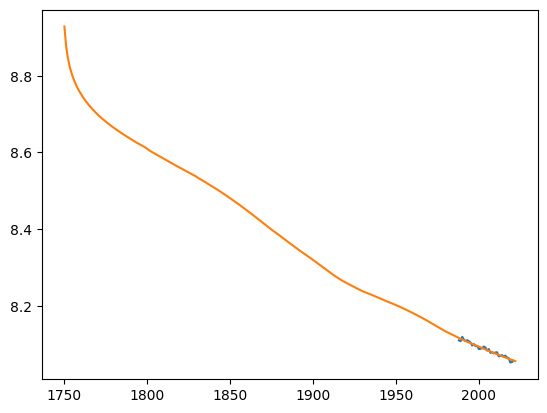

In [26]:
co2_to_ph_coef = regr.coef_[0][0]
co2_to_ph_intercept = regr.intercept_[0]

def co2_to_ph(co2):
    co2["CO2 cum"] = co2["CO2"].cumsum()
    co2["Log CO2"] = co2["CO2 cum"].map(lambda x: np.log(x))

    log_co2_array = np.array(co2["Log CO2"]).reshape(-1,1)
    predict_array = np.array([co2_to_ph_coef*x + co2_to_ph_intercept for x in log_co2_array])
    #predict_array = model_2.predict(log_co2_array)     predict raise exception for Nan, but we need it to output Nan without exception

    ph_predict = pd.DataFrame(
        {
            "Year": [t for t in range(1750, co2["Year"].values[-1]+1)],
            "PH": [h for h in predict_array],
        }
    )

    return ph_predict


# inspect the fit in historical data
co2 = pd.read_csv(r"../data/CO2.csv")
ph_prediction = co2_to_ph(co2)
plt.plot(np.asarray(joint["Year"], float), joint["PH"])
plt.plot(np.asarray(ph_prediction["Year"], float), ph_prediction["PH"])
plt.show()